In [4]:
library(phyloseq)
library(ggplot2)
#Make sure the data has the sample names on rows if not just transform the data with t()
abund_table<-read.csv("Changed_name_OTU_table.csv",row.names=1,check.names=FALSE)
meta_table<-read.csv("Mapping_file_virus.csv",row.names=1,check.names=FALSE)
#Transpose the data to have sample names on rows
abund_table<-t(abund_table)

In [5]:
#Get grouping information
grouping_info<-data.frame(row.names=rownames(meta_table),t(as.data.frame(strsplit(rownames(meta_table),"-"))))
colnames(grouping_info)<-c("AP","Nucleotide_type","Day","Month","Season")
grouping_info

,AP,Nucleotide_type,Day,Month,Season
AP-DNA-1-Jan-Winter,AP,DNA,1,Jan,Winter
AP-DNA-10-Sep-Fall,AP,DNA,10,Sep,Fall
AP-DNA-11-Oct-Fall,AP,DNA,11,Oct,Fall
AP-DNA-12-Nov-Winter,AP,DNA,12,Nov,Winter
AP-DNA-13-Jan-Winter,AP,DNA,13,Jan,Winter
AP-DNA-14-Dec-Closed,AP,DNA,14,Dec,Closed
AP-DNA-15-NA-NA,AP,DNA,15,NA,NA
AP-DNA-16-NA-NA,AP,DNA,16,NA,NA
AP-DNA-2-Feb-Winter,AP,DNA,2,Feb,Winter
AP-DNA-3-Mar-Spring,AP,DNA,3,Mar,Spring


In [6]:
meta_table<-data.frame(meta_table,grouping_info)

In [7]:
#Filter out samples not present in meta_table
abund_table<-abund_table[rownames(abund_table) %in% rownames(meta_table),]

In [8]:
#Now load the taxonomy
OTU_taxonomy<-read.csv("changed_viral_nametaxonomy.csv",row.names=1,check.names=FALSE)

In [9]:
#Convert to phyloseq
library(phyloseq)
#Convert the data to phyloseq format
OTU = otu_table(as.matrix(abund_table), taxa_are_rows = FALSE)
TAX = tax_table(as.matrix(OTU_taxonomy))
SAM = sample_data(meta_table)
physeq<-merge_phyloseq(phyloseq(OTU, TAX),SAM)

In [10]:
physeq

phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 1132 taxa and 32 samples ]
sample_data() Sample Data:       [ 32 samples by 9 sample variables ]
tax_table()   Taxonomy Table:    [ 1132 taxa by 7 taxonomic ranks ]

In [11]:
#We now take the 500 most abundant Taxa
physeq_subset<-prune_taxa(names(sort(taxa_sums(physeq), TRUE)[1:500]), physeq)

Warning message:
“Transformation introduced infinite values in discrete y-axis”

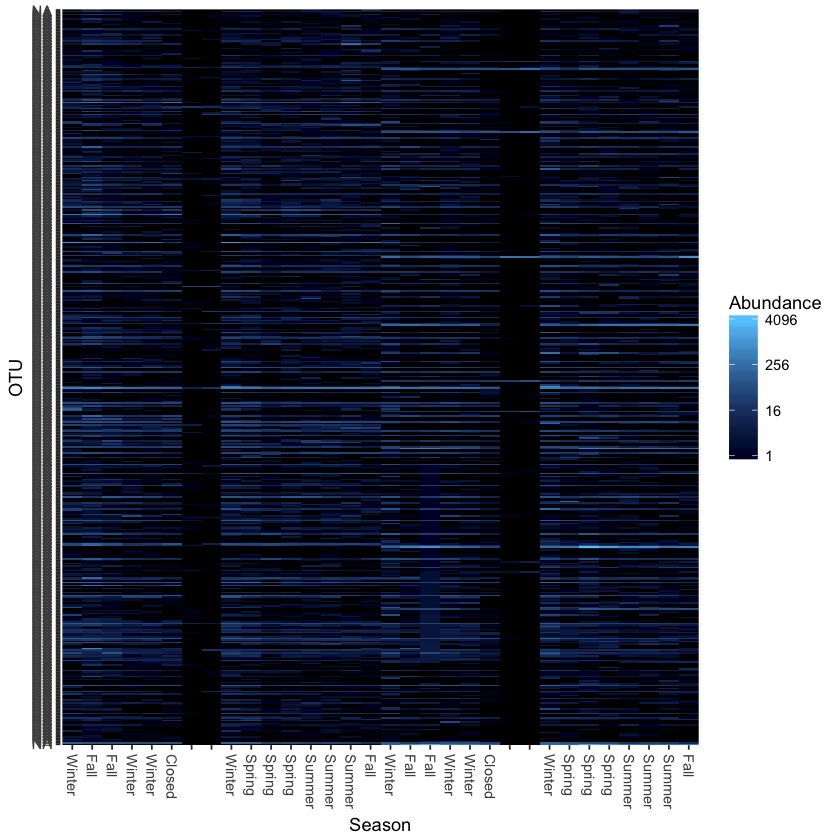

In [31]:
#Plot heatmap, the dark spots with no name are the negative controls
#pdf('PDF_Phyloseq/heatmap_wblank.pdf')
p<-plot_heatmap(physeq_subset,  method=NULL, sample.label="Season", taxa.label="Phylum")
p
#dev.off()

In [14]:
sample_data(physeq)

,Taxa,Sampling.Dates,Season,Type_of_Nucleic_Acid,AP,Nucleotide_type,Day,Month,Season.1
AP-DNA-1-Jan-Winter,AP-DNA-1_S1_blast.txt,20 January 2014-17 February 2014,Winter,DNA,AP,DNA,1,Jan,Winter
AP-DNA-10-Sep-Fall,AP-DNA-10_S2_blast.txt,29 September 2014-27 October 2014,Fall,DNA,AP,DNA,10,Sep,Fall
AP-DNA-11-Oct-Fall,AP-DNA-11_S3_blast.txt,27 October 2014-24 November 2014,Fall,DNA,AP,DNA,11,Oct,Fall
AP-DNA-12-Nov-Winter,AP-DNA-12_S4_blast.txt,24 November 2014-23 December 2014,Winter,DNA,AP,DNA,12,Nov,Winter
AP-DNA-13-Jan-Winter,AP-DNA-13_S5_blast.txt,05 Janurary 2015-02 February 2015,Winter,DNA,AP,DNA,13,Jan,Winter
AP-DNA-14-Dec-Closed,AP-DNA-14_S6_blast.txt,23 December 2014-05 January 2015,Closed,DNA,AP,DNA,14,Dec,Closed
AP-DNA-15-NA-NA,AP-DNA-15_S7_blast.txt,Unexposed Filter,NA,DNA,AP,DNA,15,NA,NA
AP-DNA-16-NA-NA,AP-DNA-16_S8_blast.txt,Negative Control,NA,DNA,AP,DNA,16,NA,NA
AP-DNA-2-Feb-Winter,AP-DNA-2_S9_blast.txt,17 February 2014-17 March 2014,Winter,DNA,AP,DNA,2,Feb,Winter
AP-DNA-3-Mar-Spring,AP-DNA-3_S10_blast.txt,17 March 2014- 14 April 2014,Spring,DNA,AP,DNA,3,Mar,Spring


Warning message:
“Removed 160 rows containing missing values (geom_errorbar).”

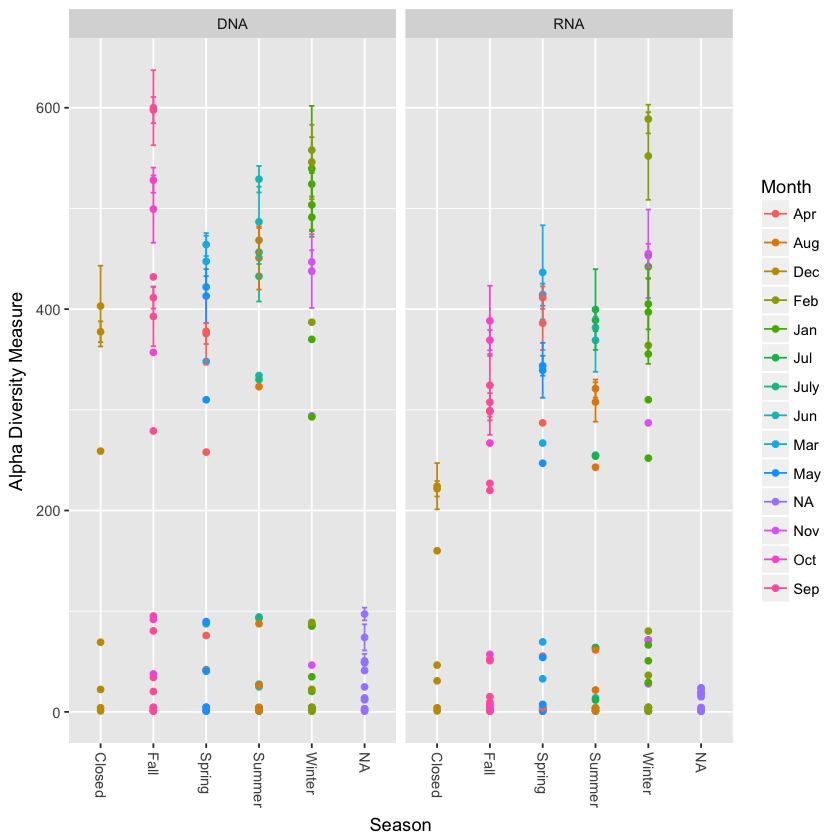

In [259]:
#Plot richness
p<-plot_richness(physeq, x = "Season", color = "Month")+facet_wrap(~Type_of_Nucleic_Acid)
p

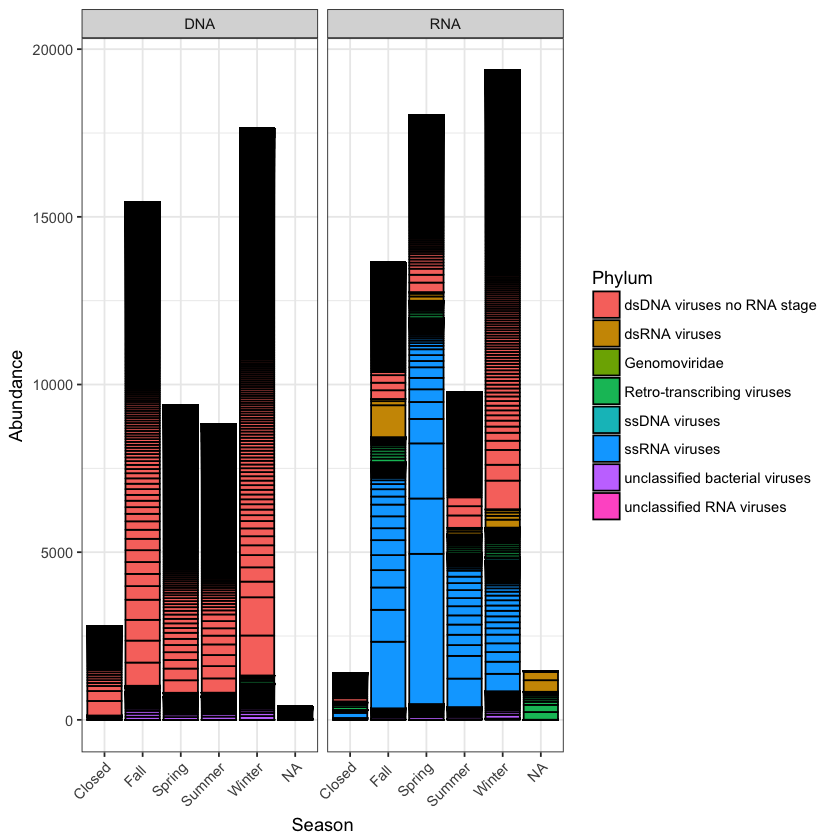

In [36]:
#Plot bar, can really see the diifference between DNA iso and RNA iso
#pdf('PDF_Phyloseq/DNA_RNA_phylum_barplot.pdf')
p<-plot_bar(physeq_subset, x="Season", fill="Phylum")+theme_bw()+facet_wrap(~Nucleotide_type)+theme(axis.text.x = element_text(angle = 45, hjust = 1))
p
#dev.off()

In [15]:
physeq.noNA=subset_samples(physeq, Season!='NA')# have to remove blanks


In [16]:
physeq.noNA.r = rarefy_even_depth(physeq.noNA, rngseed=1, sample.size=0.9*min(sample_sums(physeq.noNA)), replace=F)


`set.seed(1)` was used to initialize repeatable random subsampling.
Please record this for your records so others can reproduce.
Try `set.seed(1); .Random.seed` for the full vector
...
301OTUs were removed because they are no longer 
present in any sample after random subsampling

...


In [17]:
#subset DNA and RNA samples for separate analysis this is directly from the rarefied one but you can block this and do this
#one at a time

physeq.DNA=subset_samples(physeq.noNA.r, Nucleotide_type!='RNA')# have to remove RNA
physeq.RNA=subset_samples(physeq.noNA.r, Nucleotide_type!='DNA')# have to remove DNA

In [39]:
#Make an PCoA ordination plot based on abundance based unifrac distances with the following commands

ord <- ordinate(physeq.noNA.r, method="PCoA", distance="bray", weighted=TRUE)
#pdf('PDF_Phyloseq/MDS_Bray_curtis_DNAvsRNA.pdf')
p <- plot_ordination(physeq.noNA.r, ord, color="Month",shape='Nucleotide_type',title="Bray Curtis-Season-DNAvsRNA")
p <- p + geom_point(size=5) + theme_bw()
p
#dev.off()

pdf 
  2

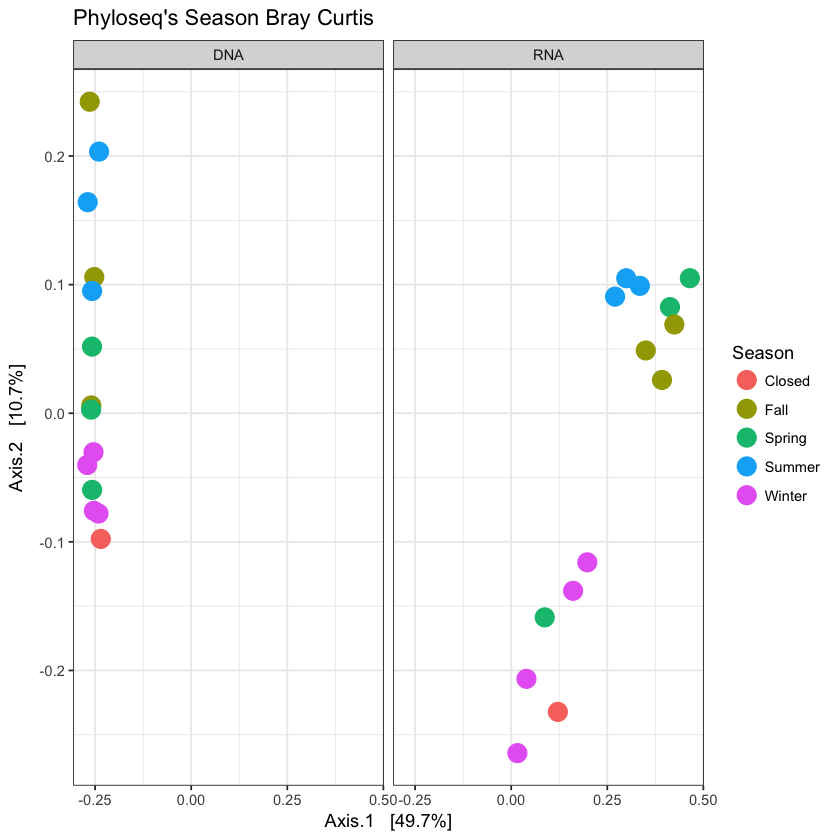

In [303]:
#Make an PCoA ordination plot based on abundance based unifrac distances with the following commands
ord <- ordinate(physeq.noNA.r, method="PCoA", distance="bray", weighted=TRUE)
p <- plot_ordination(physeq.noNA.r, ord, color="Season",title="Phyloseq's Season Bray Curtis")
p <- p + geom_point(size=5) + theme_bw()+ facet_wrap(~Nucleotide_type)
p

# Look at DNA alone


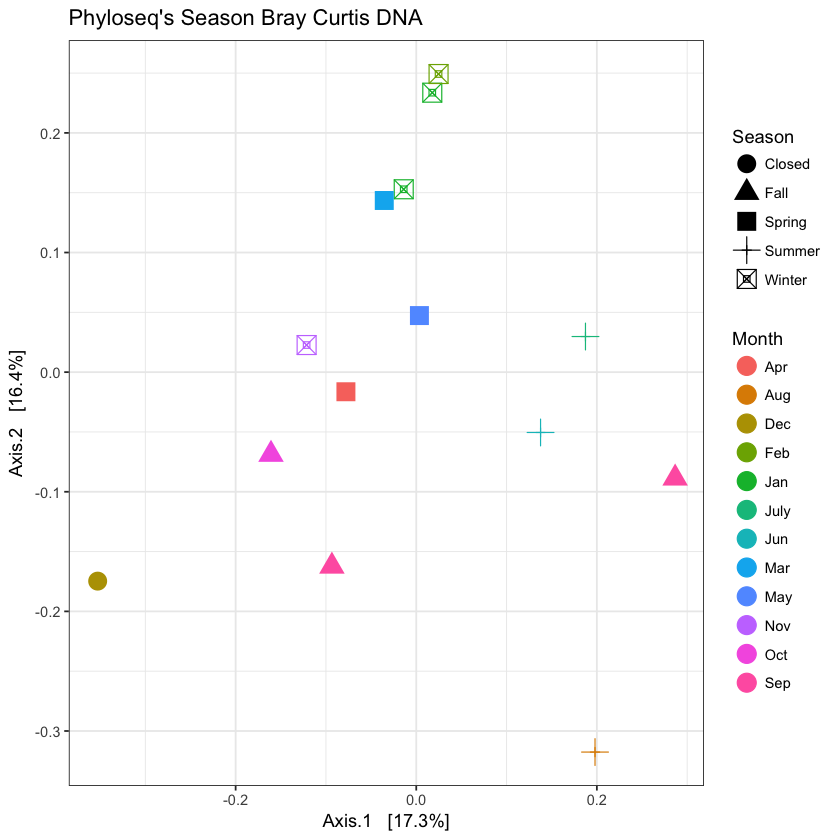

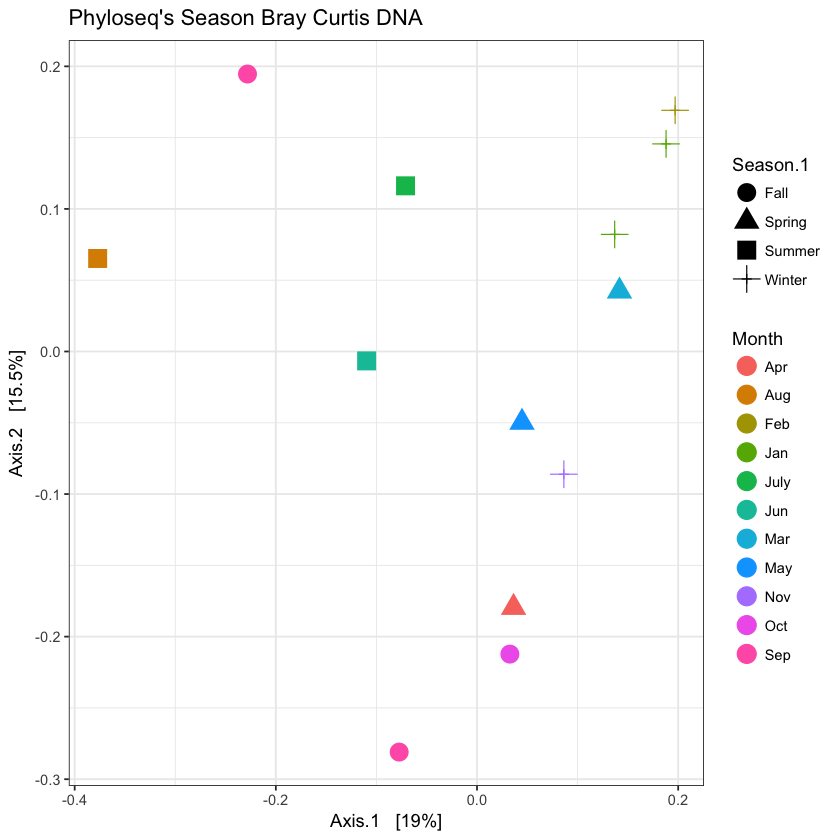

In [18]:
#Make an PCoA ordination plot based on abundance based unifrac distances with the following commands
ord <- ordinate(physeq.DNA, method="PCoA", distance="jaccard", weighted=TRUE)
p <- plot_ordination(physeq.noNA.r, ord, color="Month",shape='Season',title="Phyloseq's Season Bray Curtis DNA")
p <- p + geom_point(size=5) + theme_bw()
p

physeq.DNA.Close=subset_samples(physeq.DNA, Season.1 == 'Fall' |Season.1 == 'Spring' |Season.1 == 'Summer'| Season.1 == 'Winter' )# remove the samples from closed day

#Make an PCoA ordination plot based on abundance based unifrac distances with the following commands
ord <- ordinate(physeq.DNA.Close, method="PCoA", distance="jaccard", weighted=TRUE)
pc <- plot_ordination(physeq.DNA.Close, ord, color="Month",shape="Season.1",title="Phyloseq's Season Bray Curtis DNA")
pc <- pc + geom_point(size=5) + theme_bw()
pc

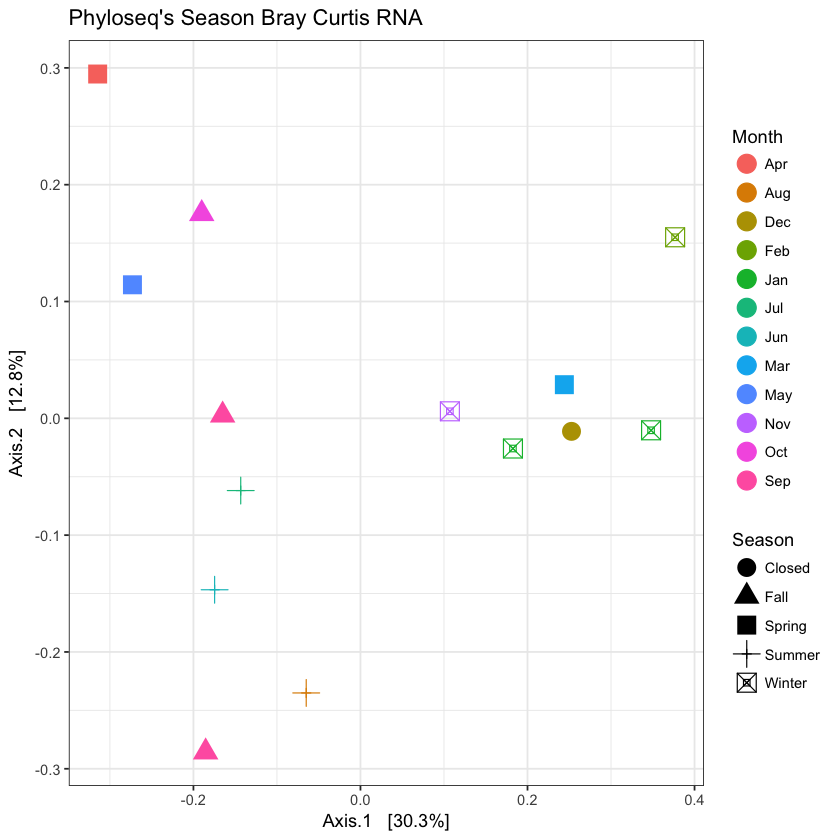

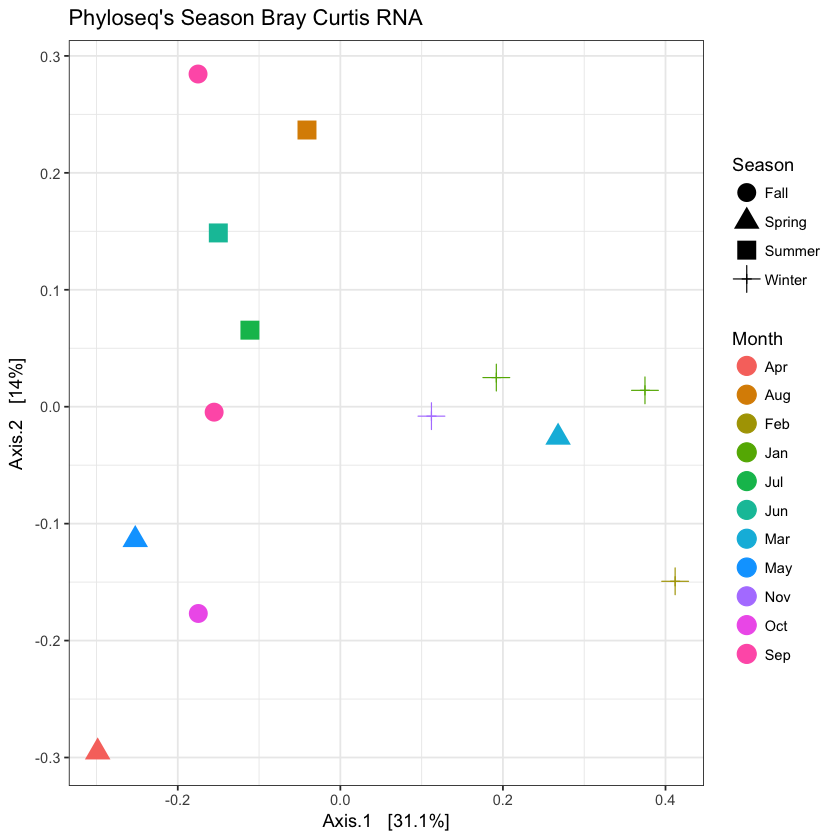

In [19]:
#Make an PCoA ordination plot based on abundance based unifrac distances with the following commands
ord <- ordinate(physeq.RNA, method="PCoA", distance="jaccard", weighted=TRUE)
p <- plot_ordination(physeq.noNA.r, ord, color="Month",shape='Season',title="Phyloseq's Season Bray Curtis RNA")
p <- p + geom_point(size=5) + theme_bw()
p

physeq.RNA.close=subset_samples(physeq.RNA, Season!='Closed')

#Make an PCoA ordination plot based on abundance based unifrac distances with the following commands
ord <- ordinate(physeq.RNA.close, method="PCoA", distance="jaccard", weighted=TRUE)
pc <- plot_ordination(physeq.RNA.close, ord, color="Month",shape='Season',title="Phyloseq's Season Bray Curtis RNA")
pc <- pc + geom_point(size=5) + theme_bw()
pc

# PERMANOVA

# DNA


Loading required package: permute
Loading required package: lattice
This is vegan 2.4-3



Permutation test for homogeneity of multivariate dispersions
Permutation: free
Number of permutations: 999

Response: Distances
          Df    Sum Sq   Mean Sq      F N.Perm Pr(>F)
Groups     3 0.0087256 0.0029085 0.8344    999  0.551
Residuals  9 0.0313726 0.0034858                     


Permutation test for homogeneity of multivariate dispersions
Permutation: free
Number of permutations: 999

Response: Distances
          Df    Sum Sq   Mean Sq      F N.Perm Pr(>F)
Groups     3 0.0087256 0.0029085 0.8344    999  0.519
Residuals  9 0.0313726 0.0034858                     

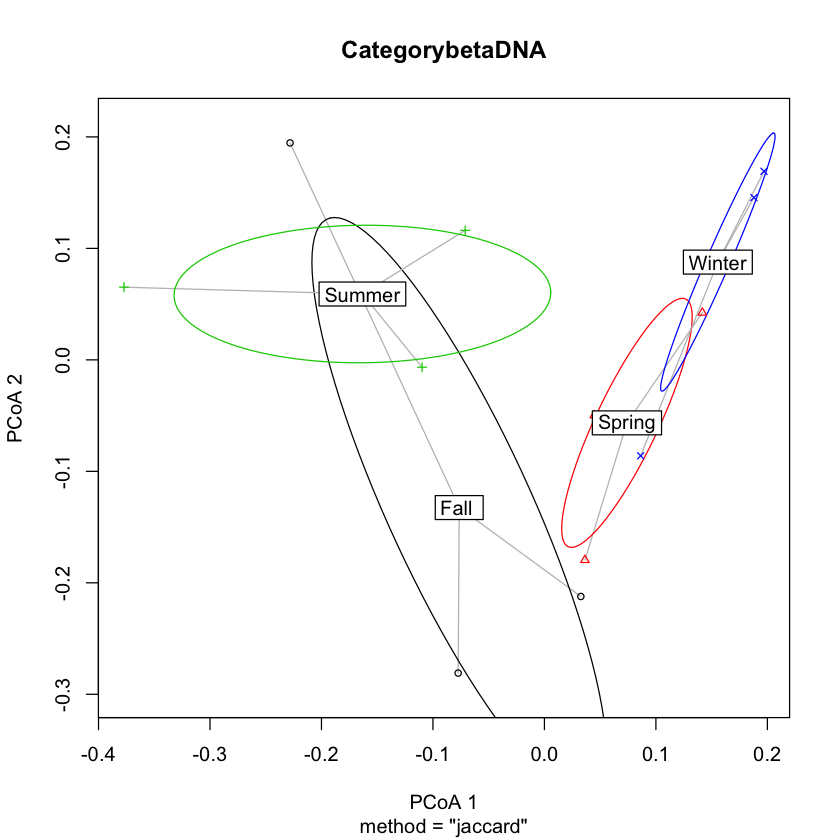

[1] "Taxa"                 "Sampling.Dates"       "Season"              
[4] "Type_of_Nucleic_Acid" "AP"                   "Nucleotide_type"     
[7] "Day"                  "Month"                "Season.1"

,Df,SumsOfSqs,MeanSqs,F.Model,R2,Pr(>F)
Season,3,0.5949082,0.1983027,1.474631,0.3295537,0.00449955
Residuals,9,1.2102854,0.1344762,NA,0.6704463,NA
Total,12,1.8051936,NA,NA,1.0000000,NA


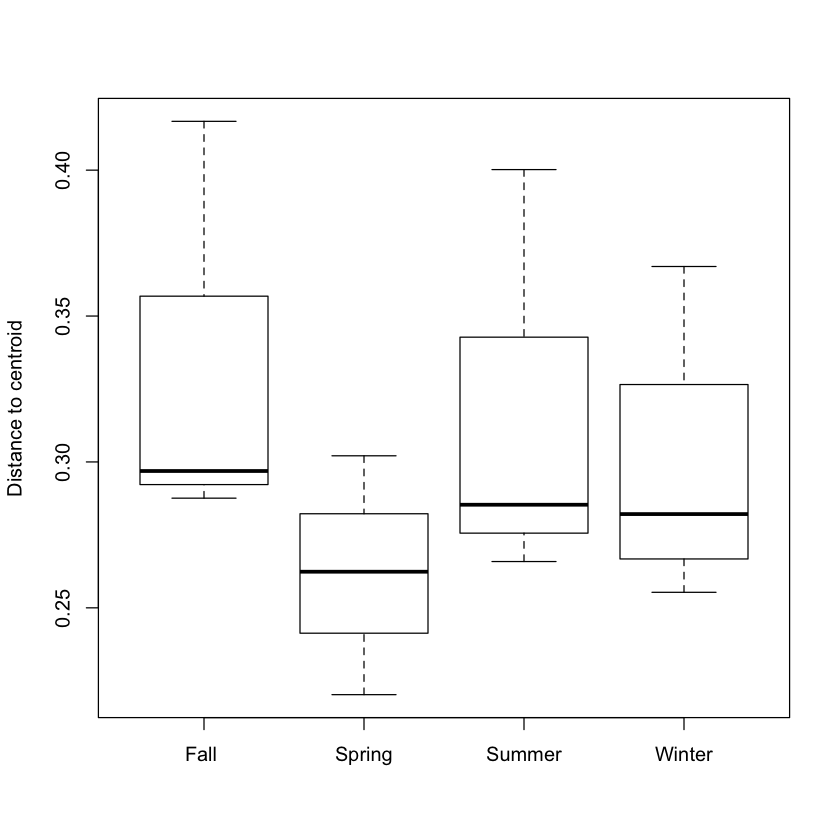

In [21]:
library('vegan')
###############################################
#####  PERMANOVA  ############-----------------
###############################################
#make a data frame from the sample_data (unweighted unifrac)
df = as(sample_data(physeq.DNA.Close), "data.frame")
d = phyloseq::distance(physeq.DNA.Close, "jaccard")
#test for homogeneity of data
sampledf <- data.frame(sample_data(physeq.DNA.Close))
beta <- betadisper(d, sampledf$Season)
permutest(beta)

CategorybetaDNA <- betadisper(d, sampledf$Season)
permutest(CategorybetaDNA)

plot(CategorybetaDNA, ellipse = TRUE, hull=F)
boxplot(CategorybetaDNA)

#now run permanova
set.seed(2)
GPNMDS = ordinate(physeq.DNA.Close, "PCoA", d)
sample_variables(physeq.DNA.Close)
a=adonis(d ~ Season, as(sample_data(physeq.DNA.Close), "data.frame"), permutations=10000, method='jaccard', weighted=FALSE)
a$aov.tab

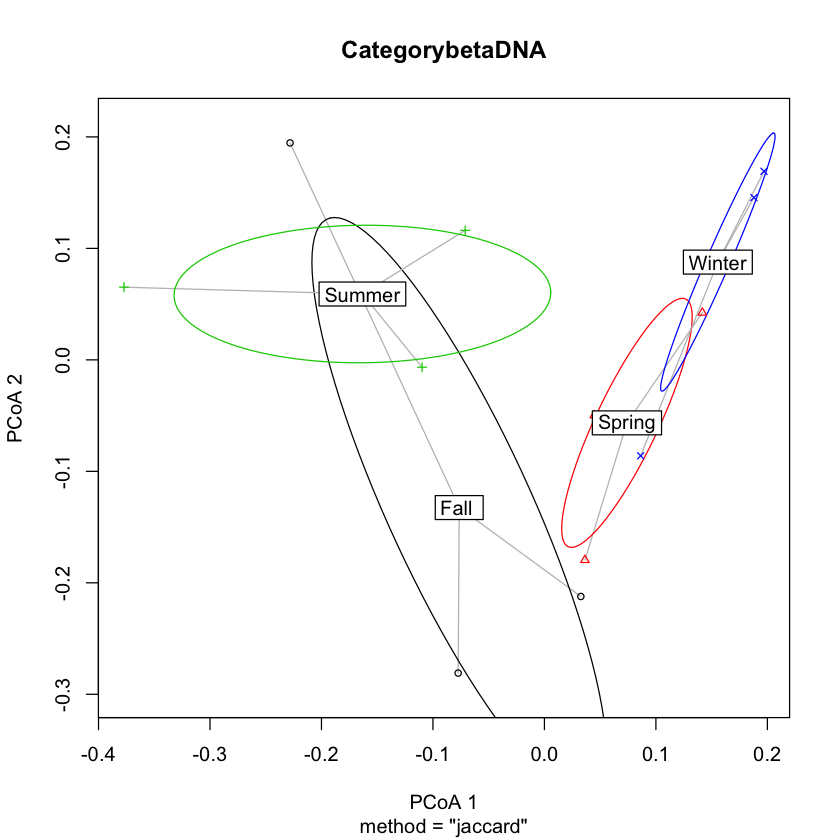

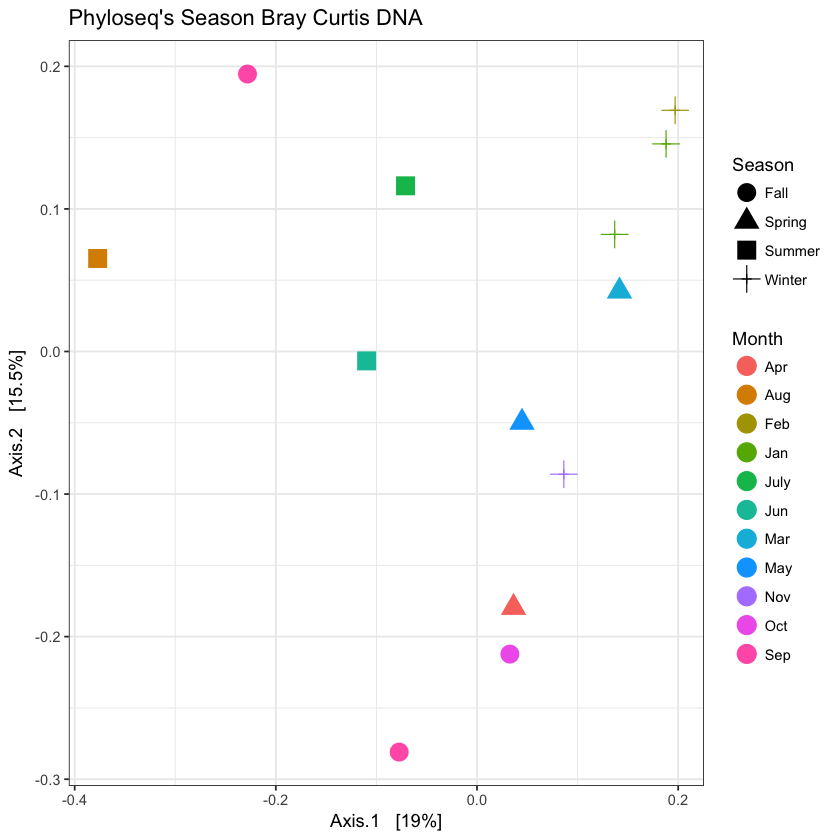

In [42]:
# Just a conparison of the betadispersion measurement from above and the regular PCoA plot
#pdf('PDF_Phyloseq/PCOA_and_beta_dispersion_DNA.pdf')
plot(CategorybetaDNA, ellipse = TRUE, hull=F)
#Make an PCoA ordination plot based on abundance based unifrac distances with the following commands
ord <- ordinate(physeq.DNA.Close, method="PCoA", distance="jaccard", weighted=TRUE)
pc <- plot_ordination(physeq.DNA.Close, ord, color="Month",shape='Season',title="Phyloseq's Season Bray Curtis DNA")
pc <- pc + geom_point(size=5) + theme_bw()
pc
#dev.off()


In [23]:
# rearrange the levels of the seasons so they can be outputed in the order that i want
#sample_data(physeq.DNA.Close)$Season.1 = factor(sample_data(physeq.DNA.Close)$Season.1, levels = c("Spring", "Summer", "Winter", "Fall"))
sample_data(physeq.DNA.Close)$Season.1 <- factor(sample_data(physeq.DNA.Close)$Season.1, levels = c("Spring", "Summer", "Fall", "Winter"))

sample_data(physeq.RNA.close)$Season.1 = factor(sample_data(physeq.RNA.close)$Season.1, levels = c("Spring", "Summer", "Fall", "Winter"))



Warning message:
“Removed 65 rows containing missing values (geom_errorbar).”

Warning message:
“Removed 65 rows containing missing values (geom_errorbar).”

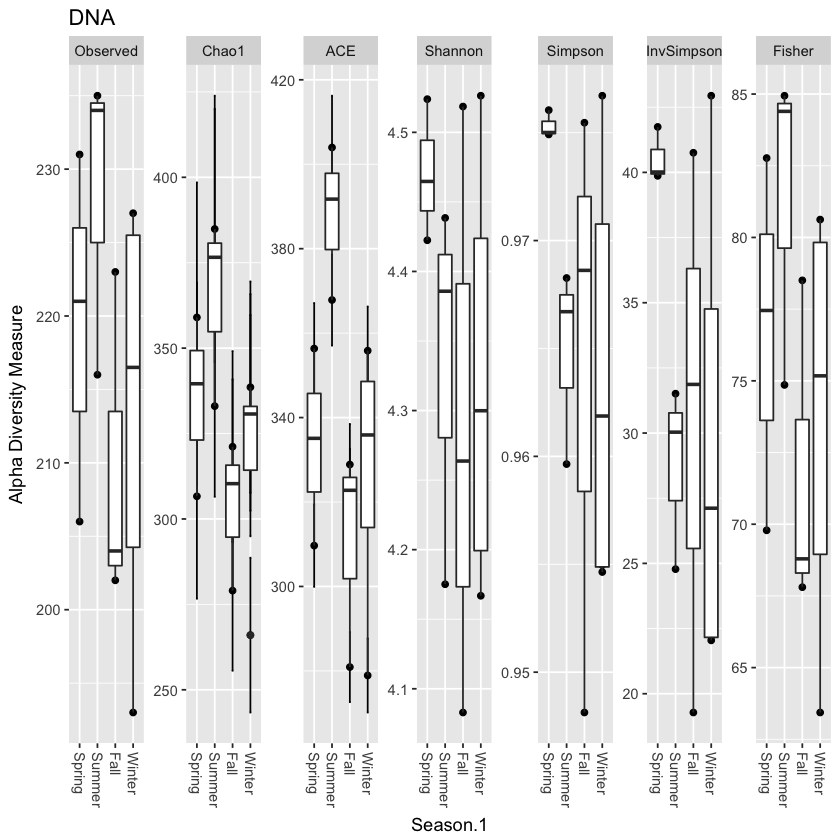

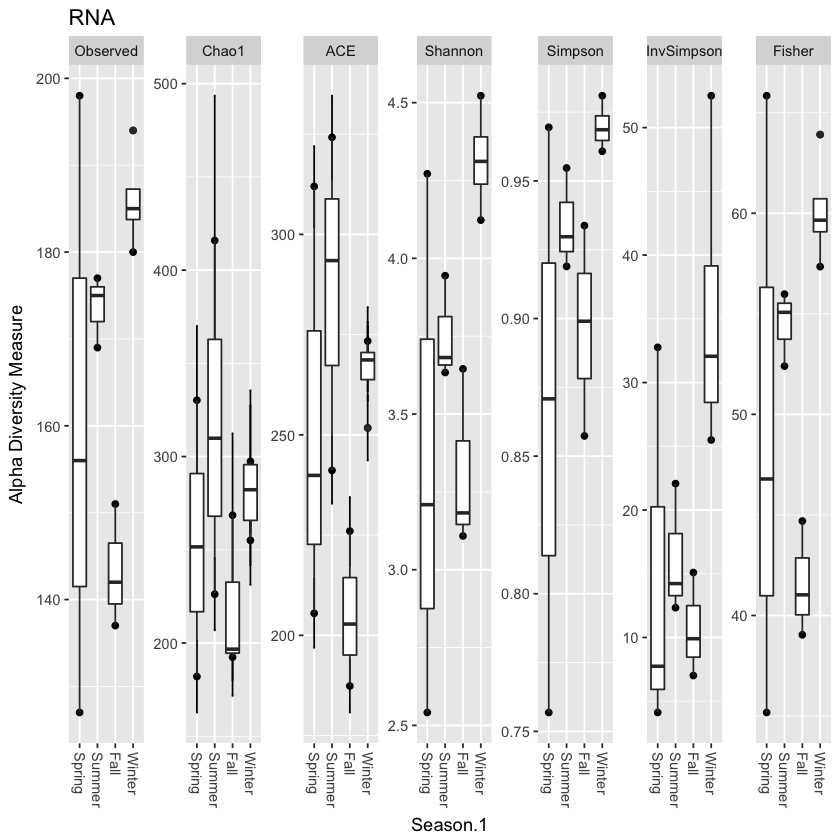

In [44]:
#Alpha diversity
#pdf('PDF_Phyloseq/DNA_RNA_alpha_diversity.pdf')
plot_richness(physeq.DNA.Close, x = "Season.1") + geom_boxplot()+ggtitle('DNA')
plot_richness(physeq.RNA.close, x = "Season.1") + geom_boxplot()+ggtitle('RNA')
#dev.off()

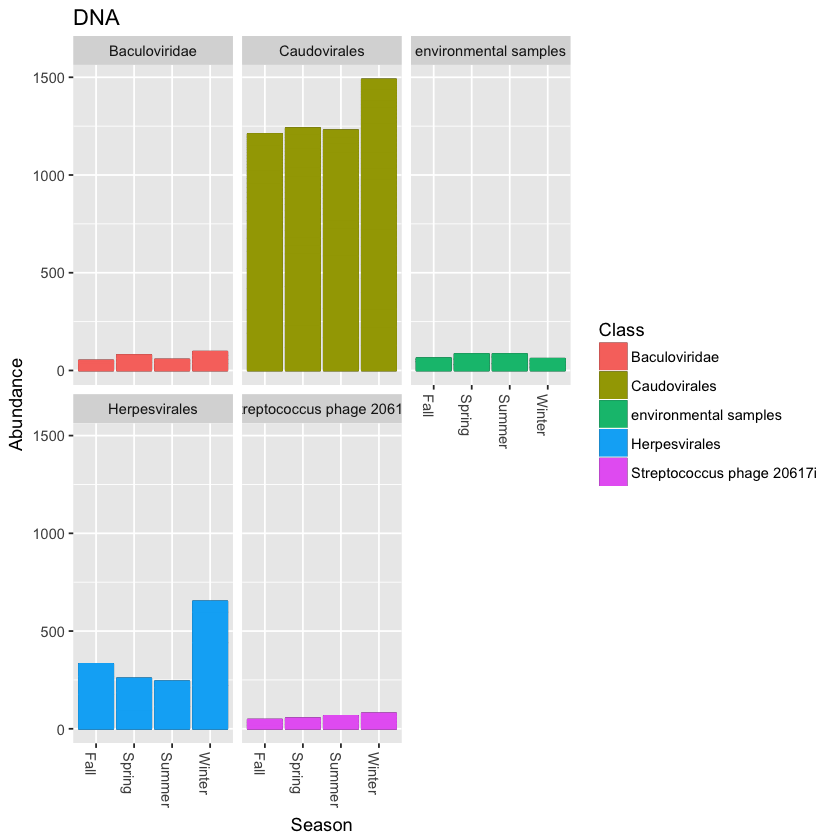

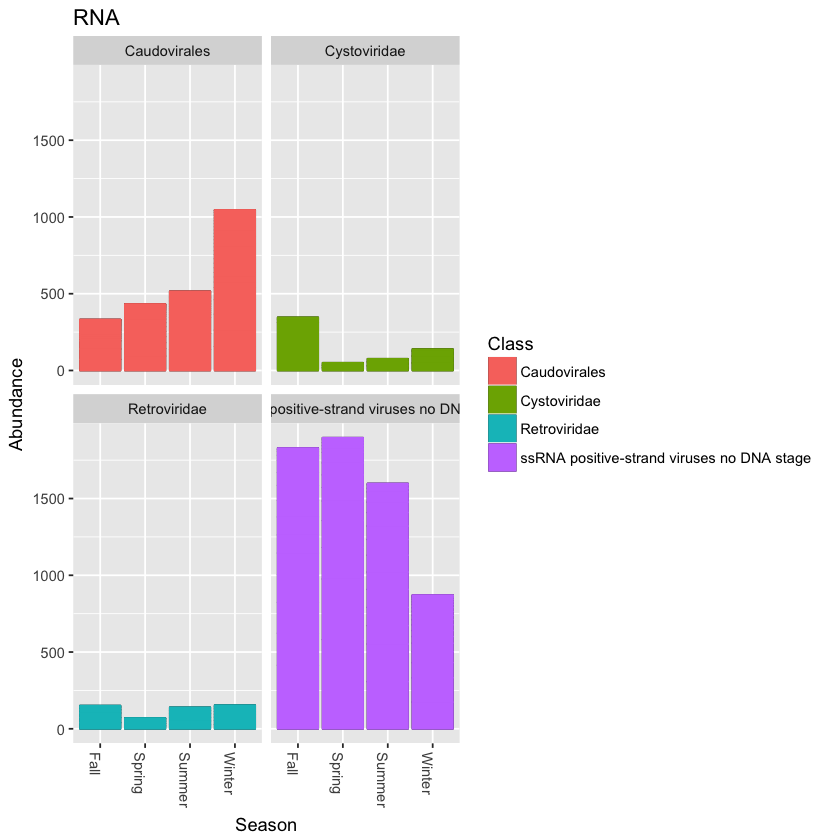

In [45]:
# enter here your graphics code, i will enter our code from above:
#pdf('PDF_Phyloseq/top15_species_barlot_.pdf')


p=plot_bar(ent10DNA, fill="Class", x='Season', title='DNA')+facet_wrap(~Class)
p + geom_bar(aes(color=Class, fill=Class),stat="identity", position="stack")
r=plot_bar(ent10RNA, fill="Class", x='Season', title='RNA')+facet_wrap(~Class)
r + geom_bar(aes(color=Class, fill=Class),stat="identity", position="stack")



In [46]:
#pdf('PDF_Phyloseq/top_15_species_barplot_DNA_and_RNA.pdf')
TopNOTUsDNA = names(sort(taxa_sums(physeq.DNA.Close), TRUE)[1:15])
TopNOTUsRNA = names(sort(taxa_sums(physeq.RNA.close), TRUE)[1:15])



ent10DNA = prune_taxa(TopNOTUsDNA, physeq.DNA.Close)
ent10RNA = prune_taxa(TopNOTUsRNA, physeq.RNA.close)


#pdf('PDF_Phyloseq/top15_DNA_vir.pdf')
# enter here your graphics code, i will enter our code from above:
p=plot_bar(ent10DNA, fill="Species", x='Season', title='DNA')+facet_wrap(~Species)
p + geom_bar(aes(color=Species, fill=Species),stat="identity", position="stack")
r=plot_bar(ent10RNA, fill="Species", x='Season', title='RNA')+facet_wrap(~Species)
r + geom_bar(aes(color=Species, fill=Species),stat="identity", position="stack")


#dev.off()

pdf 
  2

# pdf('PDF_Phyloseq/top15_DNA_vir.pdf')
# enter here your graphics code, i will enter our code from above:
p=plot_bar(ent10DNA, fill="Species", x='Season', title='DNA')
p + geom_bar(aes(color=Species, fill=Species),stat="identity", position="stack")
r=plot_bar(ent10RNA, fill="Species", x='Season', title='RNA')
r + geom_bar(aes(color=Species, fill=Species),stat="identity", position="stack")



# RNA PERMANOVA


Permutation test for homogeneity of multivariate dispersions
Permutation: free
Number of permutations: 999

Response: Distances
          Df   Sum Sq   Mean Sq     F N.Perm Pr(>F)
Groups     3 0.020268 0.0067559 0.515    999   0.71
Residuals  9 0.118065 0.0131183                    


Permutation test for homogeneity of multivariate dispersions
Permutation: free
Number of permutations: 999

Response: Distances
          Df   Sum Sq   Mean Sq     F N.Perm Pr(>F)
Groups     3 0.020268 0.0067559 0.515    999  0.698
Residuals  9 0.118065 0.0131183                    

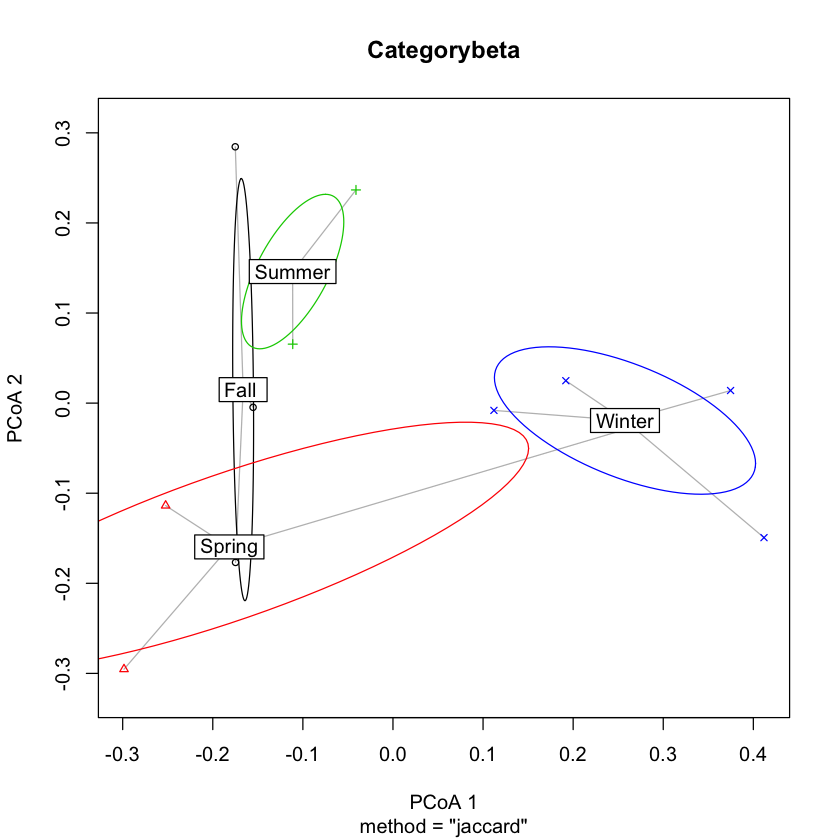

[1] "Taxa"                 "Sampling.Dates"       "Season"              
[4] "Type_of_Nucleic_Acid" "AP"                   "Nucleotide_type"     
[7] "Day"                  "Month"                "Season.1"

,Df,SumsOfSqs,MeanSqs,F.Model,R2,Pr(>F)
Season,3,0.8997383,0.2999128,1.971165,0.3965198,0.00519948
Residuals,9,1.3693499,0.1521500,NA,0.6034802,NA
Total,12,2.2690882,NA,NA,1.0000000,NA


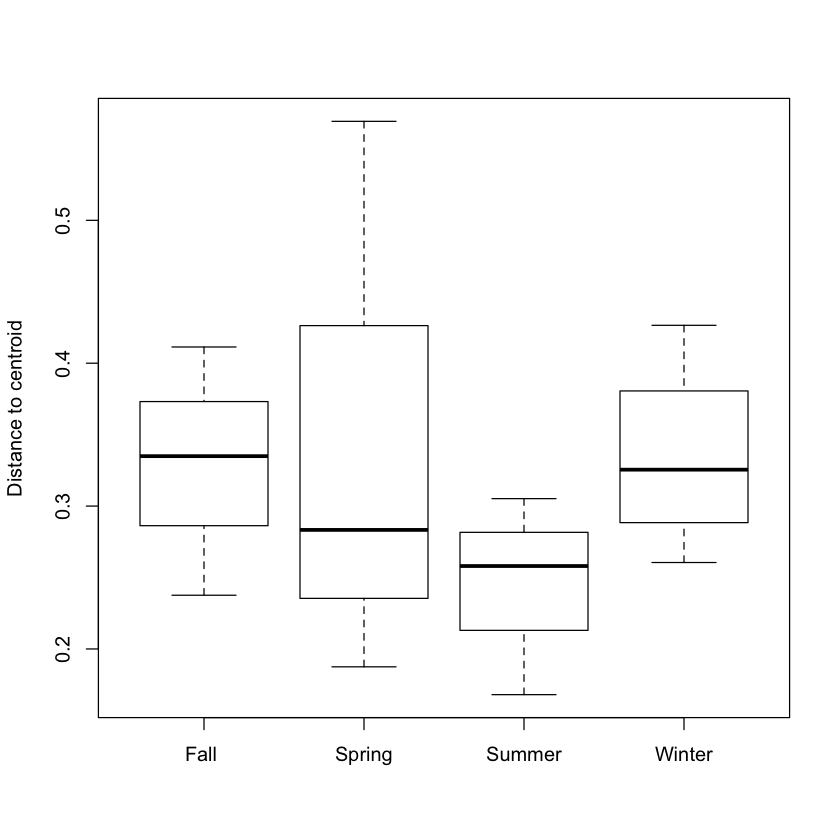

In [49]:
###############################################
#####  PERMANOVA  ############-----------------
###############################################
#make a data frame from the sample_data (unweighted unifrac)
df = as(sample_data(physeq.RNA.close), "data.frame")
d = phyloseq::distance(physeq.RNA.close, "jaccard")
#test for homogeneity of data
sampledf <- data.frame(sample_data(physeq.RNA.close))
beta <- betadisper(d, sampledf$Season)
permutest(beta)

Categorybeta <- betadisper(d, sampledf$Season)
permutest(Categorybeta)

plot(Categorybeta, ellipse = TRUE, hull=F)
boxplot(Categorybeta)

#now run permanova
set.seed(2)
GPNMDS = ordinate(physeq.RNA.close, "PCoA-RNA", d)
sample_variables(physeq.RNA.close)
a=adonis(d ~ Season, as(sample_data(physeq.RNA.close), "data.frame"), permutations=10000, method='jaccard')
a$aov.tab

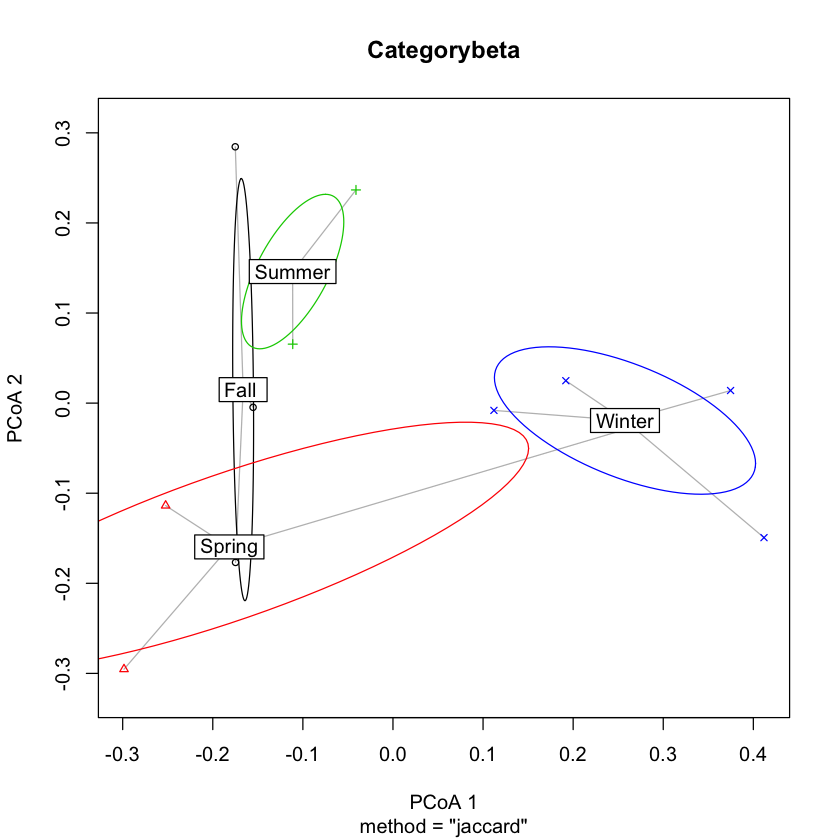

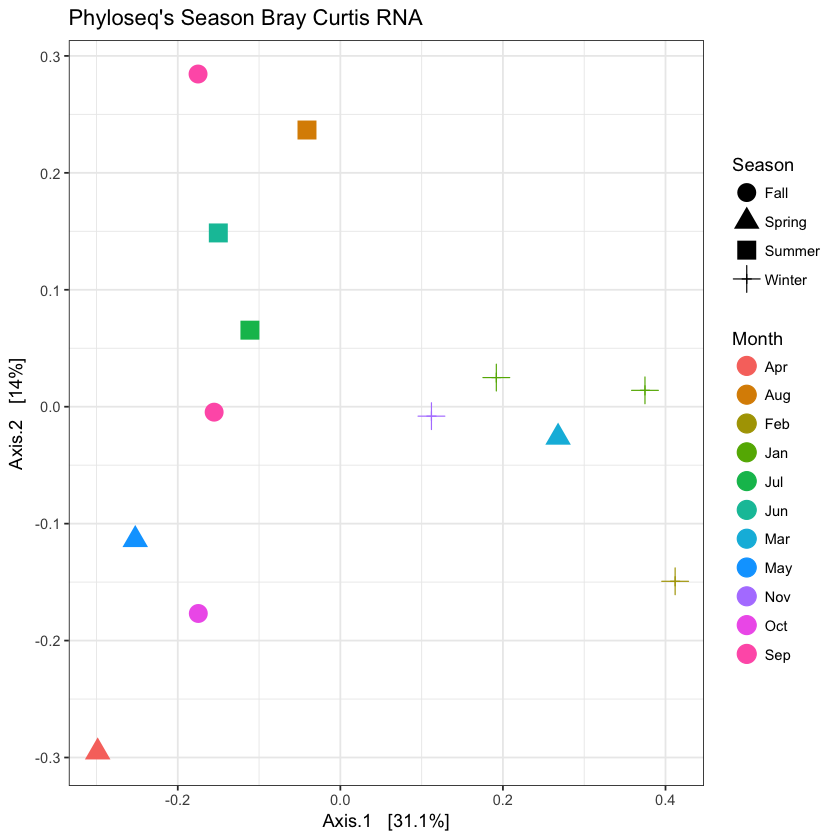

In [51]:
#pdf('PDF_Phyloseq/beta_disperion_and_PCoA_RNA.pdf')
plot(Categorybeta, ellipse = TRUE, hull=F)


#Make an PCoA ordination plot based on abundance based unifrac distances with the following commands
ord <- ordinate(physeq.RNA.close, method="PCoA", distance="jaccard", weighted=TRUE)
pc <- plot_ordination(physeq.RNA.close, ord, color="Month",shape='Season',title="Phyloseq's Season Bray Curtis RNA")
pc <- pc + geom_point(size=5) + theme_bw()
pc
#dev.off()

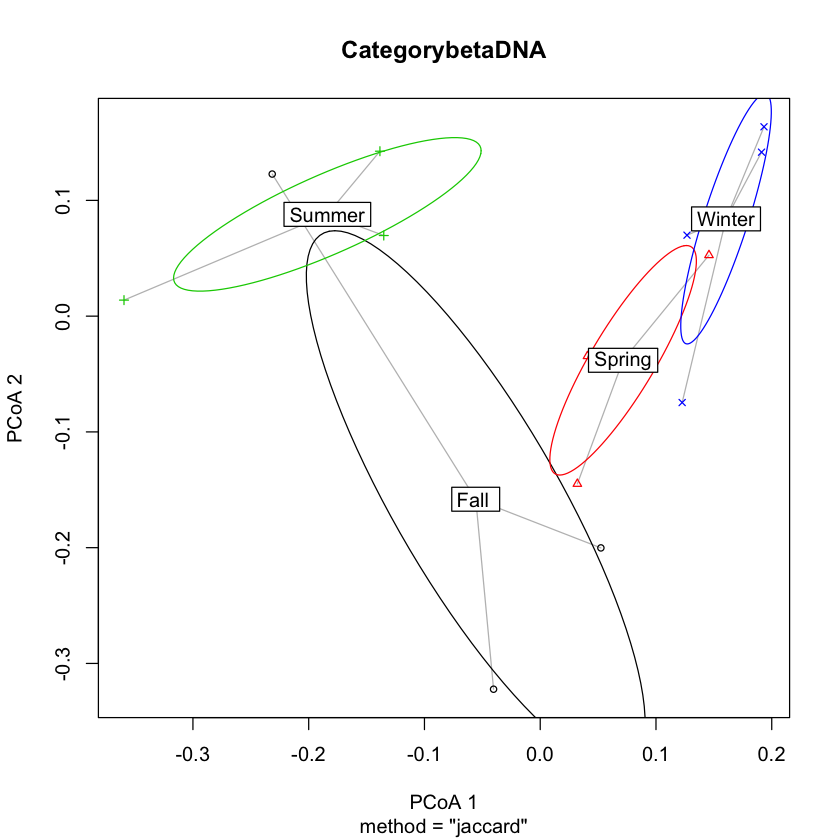

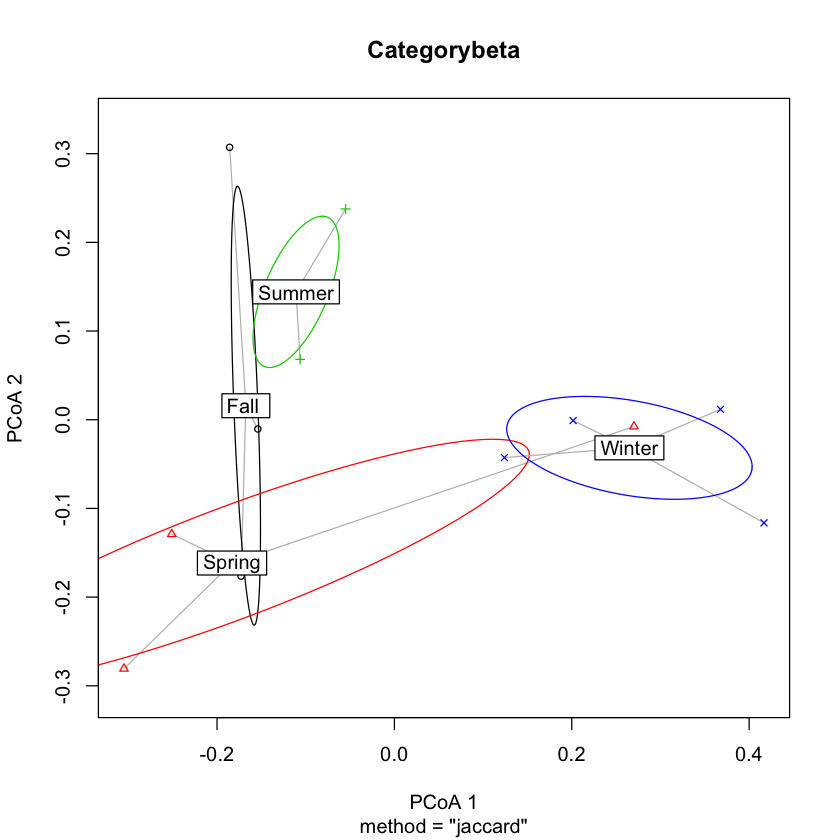

In [140]:
#Comparing beta dispersion of RNA vs DNA
plot(CategorybetaDNA, ellipse = TRUE, hull=F)
plot(Categorybeta, ellipse = TRUE, hull=F)